In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import helper
plt.style.use('dark_background')
%matplotlib inline

In [2]:
#Data Loading
from sklearn.datasets import load_boston
boston = load_boston() 

x_data = pd.DataFrame(boston.data, columns = boston.feature_names)
y_data = (boston.target)
x_data['CHAS'].astype('category');

In [3]:
#Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 42)

In [4]:
#Preparing the x_datasets
x_train_prepared = helper.data_pipeline.fit_transform(x_train)

In [5]:
#Selecting models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

models = {
    'lin_reg' : LinearRegression(),
    'sgd' : SGDRegressor(),
    'ridge': Ridge(),
    'lasso' : Lasso(),
    'elastic' : ElasticNet()
}

parameters = {
    'lin_reg' : [{'normalize' : [True, False], 'fit_intercept' : [True, False]}],
    'sgd' : [{'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'], 'max_iter':[10000]}],
    'ridge' : {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    'lasso' : {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    'elastic' : [{'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'selection' : ['cyclic', 'random']}]
}

In [6]:
model_eval = helper.multiModelSelection(models, parameters)
model_eval.fit(x_train_prepared, y_train, cv = 5, scoring = 'neg_mean_squared_error')

Gridsearch for lin_reg model
Gridsearch for sgd model


C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before 

Gridsearch for ridge model
Gridsearch for lasso model
Gridsearch for elastic model
Done.


In [7]:
#Results
results = model_eval.display_results()
results['mean_test_score'] = results['mean_test_score'].apply(lambda x: np.sqrt(-x))
results.round(2)

,Chosen Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,param_alpha,param_learning_rate,param_max_iter,param_selection
0,ridge,0.00,0.00,0.0,0.0,NaN,NaN,{'alpha': 10},-2.266000e+01,-3.139000e+01,-2.566000e+01,-1.979000e+01,-2.380000e+01,4.970000e+00,3.870000e+00,10,NaN,NaN,NaN
1,ridge,0.00,0.00,0.0,0.0,NaN,NaN,{'alpha': 1},-2.265000e+01,-3.195000e+01,-2.478000e+01,-2.022000e+01,-2.386000e+01,4.970000e+00,3.940000e+00,1,NaN,NaN,NaN
2,elastic,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.01, 'selection': 'random'}",-2.265000e+01,-3.188000e+01,-2.495000e+01,-2.012000e+01,-2.388000e+01,4.970000e+00,3.940000e+00,0.01,NaN,NaN,random
3,elastic,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.01, 'selection': 'cyclic'}",-2.265000e+01,-3.188000e+01,-2.496000e+01,-2.012000e+01,-2.388000e+01,4.970000e+00,3.940000e+00,0.01,NaN,NaN,cyclic
4,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.0001, 'learning_rate': 'adaptive',...",-2.271000e+01,-3.203000e+01,-2.470000e+01,-2.023000e+01,-2.386000e+01,4.970000e+00,3.960000e+00,0.0001,adaptive,10000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 10000, 'learning_rate': 'optimal', '...",-4.694600e+02,-5.620300e+02,-5.302200e+02,-4.327500e+02,-5.379500e+02,2.251000e+01,4.785000e+01,10000,optimal,10000,NaN
72,lin_reg,0.00,0.00,0.0,0.0,False,False,"{'fit_intercept': False, 'normalize': False}",-5.843100e+02,-6.002100e+02,-5.808100e+02,-5.624600e+02,-5.609700e+02,2.404000e+01,1.464000e+01,NaN,NaN,NaN,NaN
73,lin_reg,0.00,0.00,0.0,0.0,False,True,"{'fit_intercept': False, 'normalize': True}",-5.843100e+02,-6.002100e+02,-5.808100e+02,-5.624600e+02,-5.609700e+02,2.404000e+01,1.464000e+01,NaN,NaN,NaN,NaN
74,sgd,0.18,0.01,0.0,0.0,NaN,NaN,"{'alpha': 0.1, 'learning_rate': 'optimal', 'ma...",-7.388690e+03,-1.228890e+03,-5.040505e+05,-6.419384e+04,-4.647049e+06,1.022150e+03,1.810826e+06,0.1,optimal,10000,NaN


In [11]:
#It seems that ridge and elastic net were the best models. I will be evaluating them further.
import joblib

ridge_10 = Ridge(alpha=10).fit(x_train_prepared, y_train)
ridge_1 = Ridge(alpha=1).fit(x_train_prepared, y_train)
elastic_rand =ElasticNet(alpha = 0.01, selection='random').fit(x_train_prepared, y_train)
elastic_cyc =ElasticNet(alpha = 0.01, selection='random').fit(x_train_prepared, y_train)

joblib.dump(ridge_10, 'ridge_10.pkl')
joblib.dump(ridge_1, 'ridge_1.pkl')
joblib.dump(elastic_cyc, 'elastic_cyc.pkl')
joblib.dump(elastic_rand, 'elastic_rand.pkl')

['elastic_rand.pkl']

In [30]:
#Predictions
r10_results = ridge_10.predict(x_train_prepared)
r1_results = ridge_1.predict(x_train_prepared)
erand_results = elastic_rand.predict(x_train_prepared)
ecyc_results = elastic_cyc.predict(x_train_prepared)

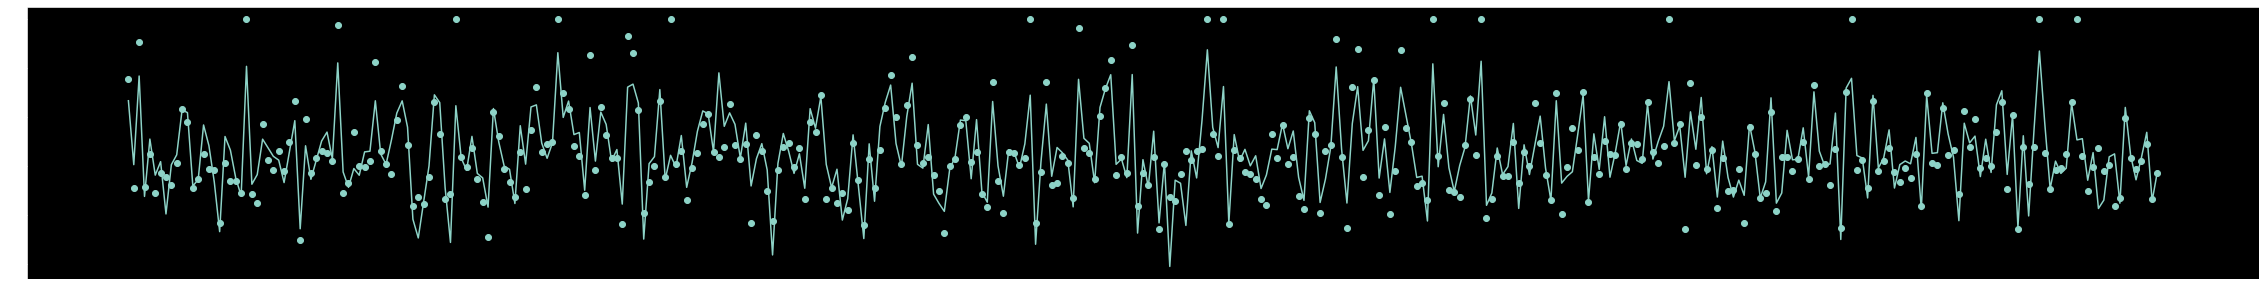

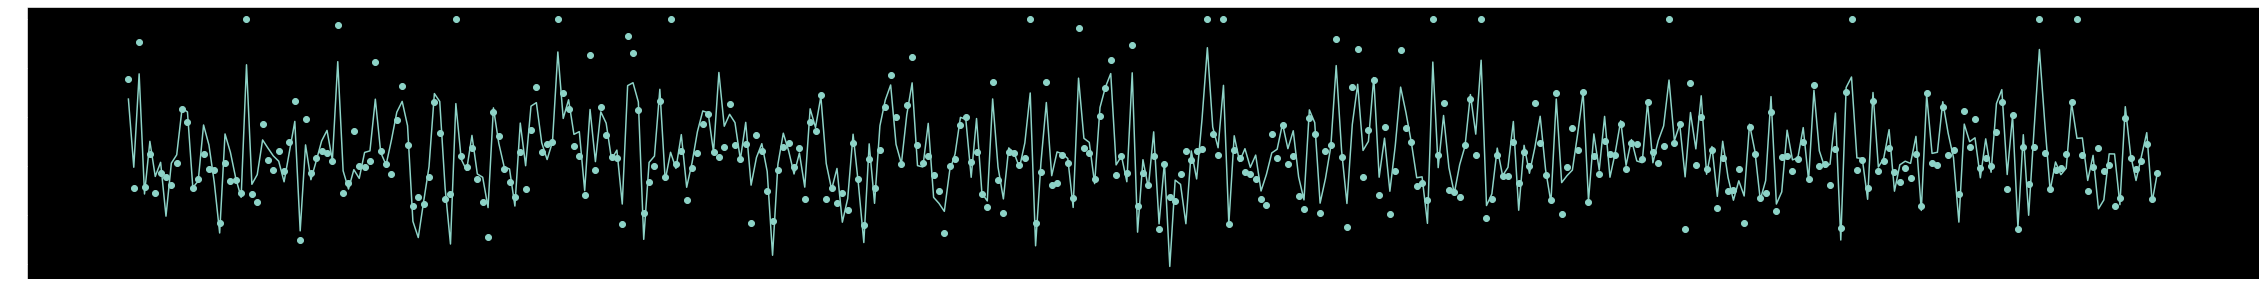

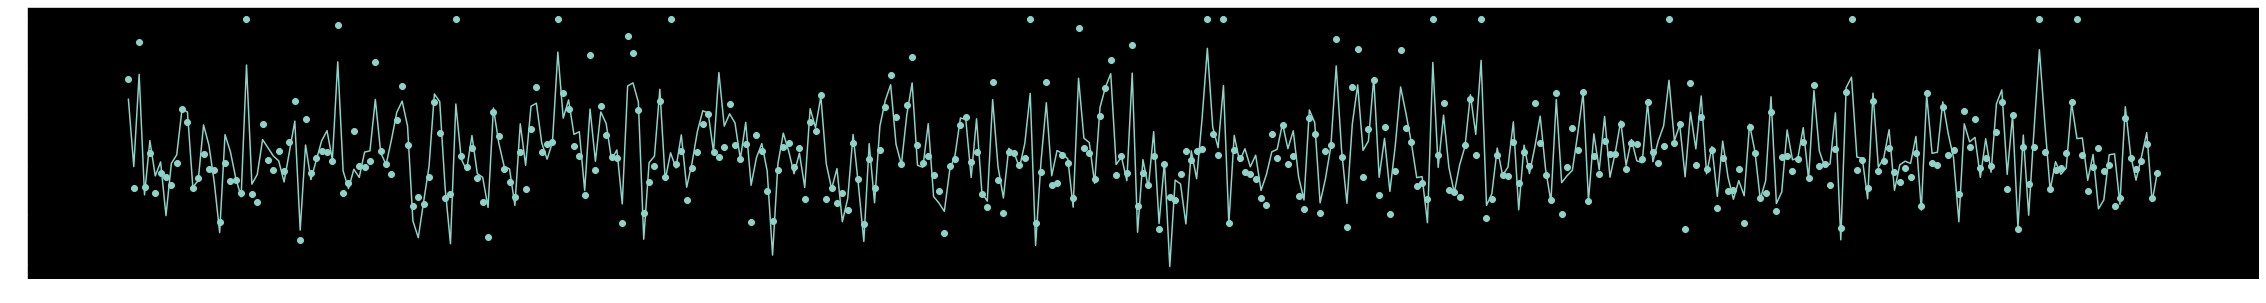

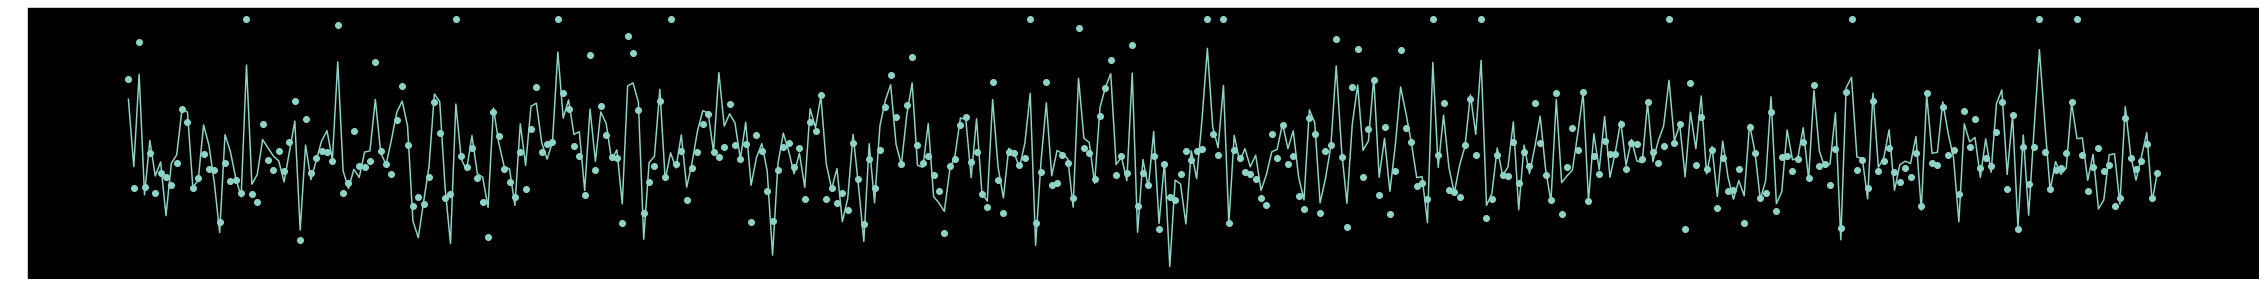

In [44]:
#Checking for overfitting
plt.figure(figsize = (40,5))
plt.scatter(x = range(len(y_train)), y = y_train)
plt.plot(r10_results)
plt.figure(figsize = (40,5))
plt.scatter(x = range(len(y_train)), y = y_train)
plt.plot(r1_results)
plt.figure(figsize = (40,5))
plt.scatter(x = range(len(y_train)), y = y_train)
plt.plot(erand_results)
plt.figure(figsize = (40,5))
plt.scatter(x = range(len(y_train)), y = y_train)
plt.plot(ecyc_results)

In [77]:
#It seems that all models are kind of overfitted, lets check the feature importances
importances = [ridge_10.coef_, ridge_1.coef_, elastic_rand.coef_, elastic_cyc.coef_]
importances = list(map(lambda x: x.round(3), importances))
importance_df = pd.DataFrame(importances, columns = x_train.columns)
importance_scale = importance_df.mean().round(2).map(lambda x: abs(x)).sort_values()
importance_scale = pd.DataFrame(importance_scale, columns = ['Importance'])
importance_scale.sort_values(by = 'Importance', inplace = True, ascending = False)
importance_scale['proportion'] = ((importance_scale/importance_scale.sum())*100).round(3)
importance_scale['cumulative_prop'] = importance_scale['proportion'].cumsum()
importance_scale

,Importance,proportion,cumulative_prop
LSTAT,3.65,17.523,17.523
RM,3.16,15.170,32.693
DIS,2.81,13.490,46.183
PTRATIO,2.04,9.794,55.977
RAD,1.93,9.265,65.242
NOX,1.81,8.689,73.931
TAX,1.41,6.769,80.700
B,1.14,5.473,86.173
CRIM,1.02,4.897,91.070
CHAS,0.75,3.601,94.671


In [115]:
#It seems that the first 6 features respond for 80% of the importance. I will retrain the models with only these features.
x_data_filtered = x_data.drop(labels = ['INDUS', 'AGE', 'ZN', 'CHAS', 'CRIM', 'B'], axis = 'columns')
x_train, x_test, y_train, y_test = train_test_split(x_data_filtered, y_data, test_size = 0.25, random_state = 42)
x_prepared = helper.data_pipeline.fit_transform(x_train)

In [116]:
#Training the same models
models = {
    'lin_reg' : LinearRegression(),
    'sgd' : SGDRegressor(),
    'ridge': Ridge(),
    'lasso' : Lasso(),
    'elastic' : ElasticNet()
}

parameters = {
    'lin_reg' : [{'normalize' : [True, False], 'fit_intercept' : [True, False]}],
    'sgd' : [{'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'], 'max_iter':[10000]}],
    'ridge' : {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    'lasso' : {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    'elastic' : [{'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'selection' : ['cyclic', 'random']}]
}

model_eval = helper.multiModelSelection(models, parameters)
model_eval.fit(x_train_prepared, y_train, cv = 5, scoring = 'neg_mean_squared_error')

Gridsearch for lin_reg model
Gridsearch for sgd model


C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\ruben\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before 

Gridsearch for ridge model
Gridsearch for lasso model
Gridsearch for elastic model
Done.


In [117]:
#Results
results = model_eval.display_results()
results['mean_test_score'] = results['mean_test_score'].apply(lambda x: np.sqrt(-x))
results.round(2)

,Chosen Model,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,param_alpha,param_learning_rate,param_max_iter,param_selection
0,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.01, 'learning_rate': 'optimal', 'm...",-2.295000e+01,-3.174000e+01,-2.597000e+01,-1.956000e+01,-2.274000e+01,4.960000e+00,4.110000e+00,0.01,optimal,10000,NaN
1,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.001, 'learning_rate': 'adaptive', ...",-2.265000e+01,-3.193000e+01,-2.458000e+01,-2.020000e+01,-2.390000e+01,4.960000e+00,3.930000e+00,0.001,adaptive,10000,NaN
2,ridge,0.00,0.00,0.0,0.0,NaN,NaN,{'alpha': 10},-2.266000e+01,-3.139000e+01,-2.566000e+01,-1.979000e+01,-2.380000e+01,4.970000e+00,3.870000e+00,10,NaN,NaN,NaN
3,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.001, 'learning_rate': 'invscaling'...",-2.276000e+01,-3.232000e+01,-2.540000e+01,-1.917000e+01,-2.377000e+01,4.970000e+00,4.330000e+00,0.001,invscaling,10000,NaN
4,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.01, 'learning_rate': 'adaptive', '...",-2.256000e+01,-3.190000e+01,-2.503000e+01,-2.012000e+01,-2.383000e+01,4.970000e+00,3.960000e+00,0.01,adaptive,10000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,lin_reg,0.00,0.00,0.0,0.0,False,False,"{'fit_intercept': False, 'normalize': False}",-5.843100e+02,-6.002100e+02,-5.808100e+02,-5.624600e+02,-5.609700e+02,2.404000e+01,1.464000e+01,NaN,NaN,NaN,NaN
72,lin_reg,0.00,0.00,0.0,0.0,False,True,"{'fit_intercept': False, 'normalize': True}",-5.843100e+02,-6.002100e+02,-5.808100e+02,-5.624600e+02,-5.609700e+02,2.404000e+01,1.464000e+01,NaN,NaN,NaN,NaN
73,sgd,0.18,0.01,0.0,0.0,NaN,NaN,"{'alpha': 0.1, 'learning_rate': 'optimal', 'ma...",-5.031720e+04,-3.595701e+06,-7.347862e+05,-2.641000e+01,-5.913586e+05,9.972200e+02,1.332417e+06,0.1,optimal,10000,NaN
74,sgd,0.00,0.00,0.0,0.0,NaN,NaN,"{'alpha': 0.001, 'learning_rate': 'optimal', '...",-1.663900e+02,-4.802000e+01,-3.720000e+01,-3.343242e+19,-3.242000e+01,2.585824e+09,1.337297e+19,0.001,optimal,10000,NaN


In [118]:
#It seems that this time, sgd and ridge were the best models. I will be evaluating them further.
import joblib

sgd = SGDRegressor(alpha=0.001, learning_rate='adaptive').fit(x_train_prepared, y_train)
ridge_filtered = Ridge(alpha=10).fit(x_train_prepared, y_train)
joblib.dump(ridge_filtered, 'ridge_filt.pkl')
joblib.dump(sgd, 'sgd.pkl')

#Predictions
sgd_results = sgd.predict(x_train_prepared)
ridge_filtered_results = ridge_filtered.predict(x_train_prepared)


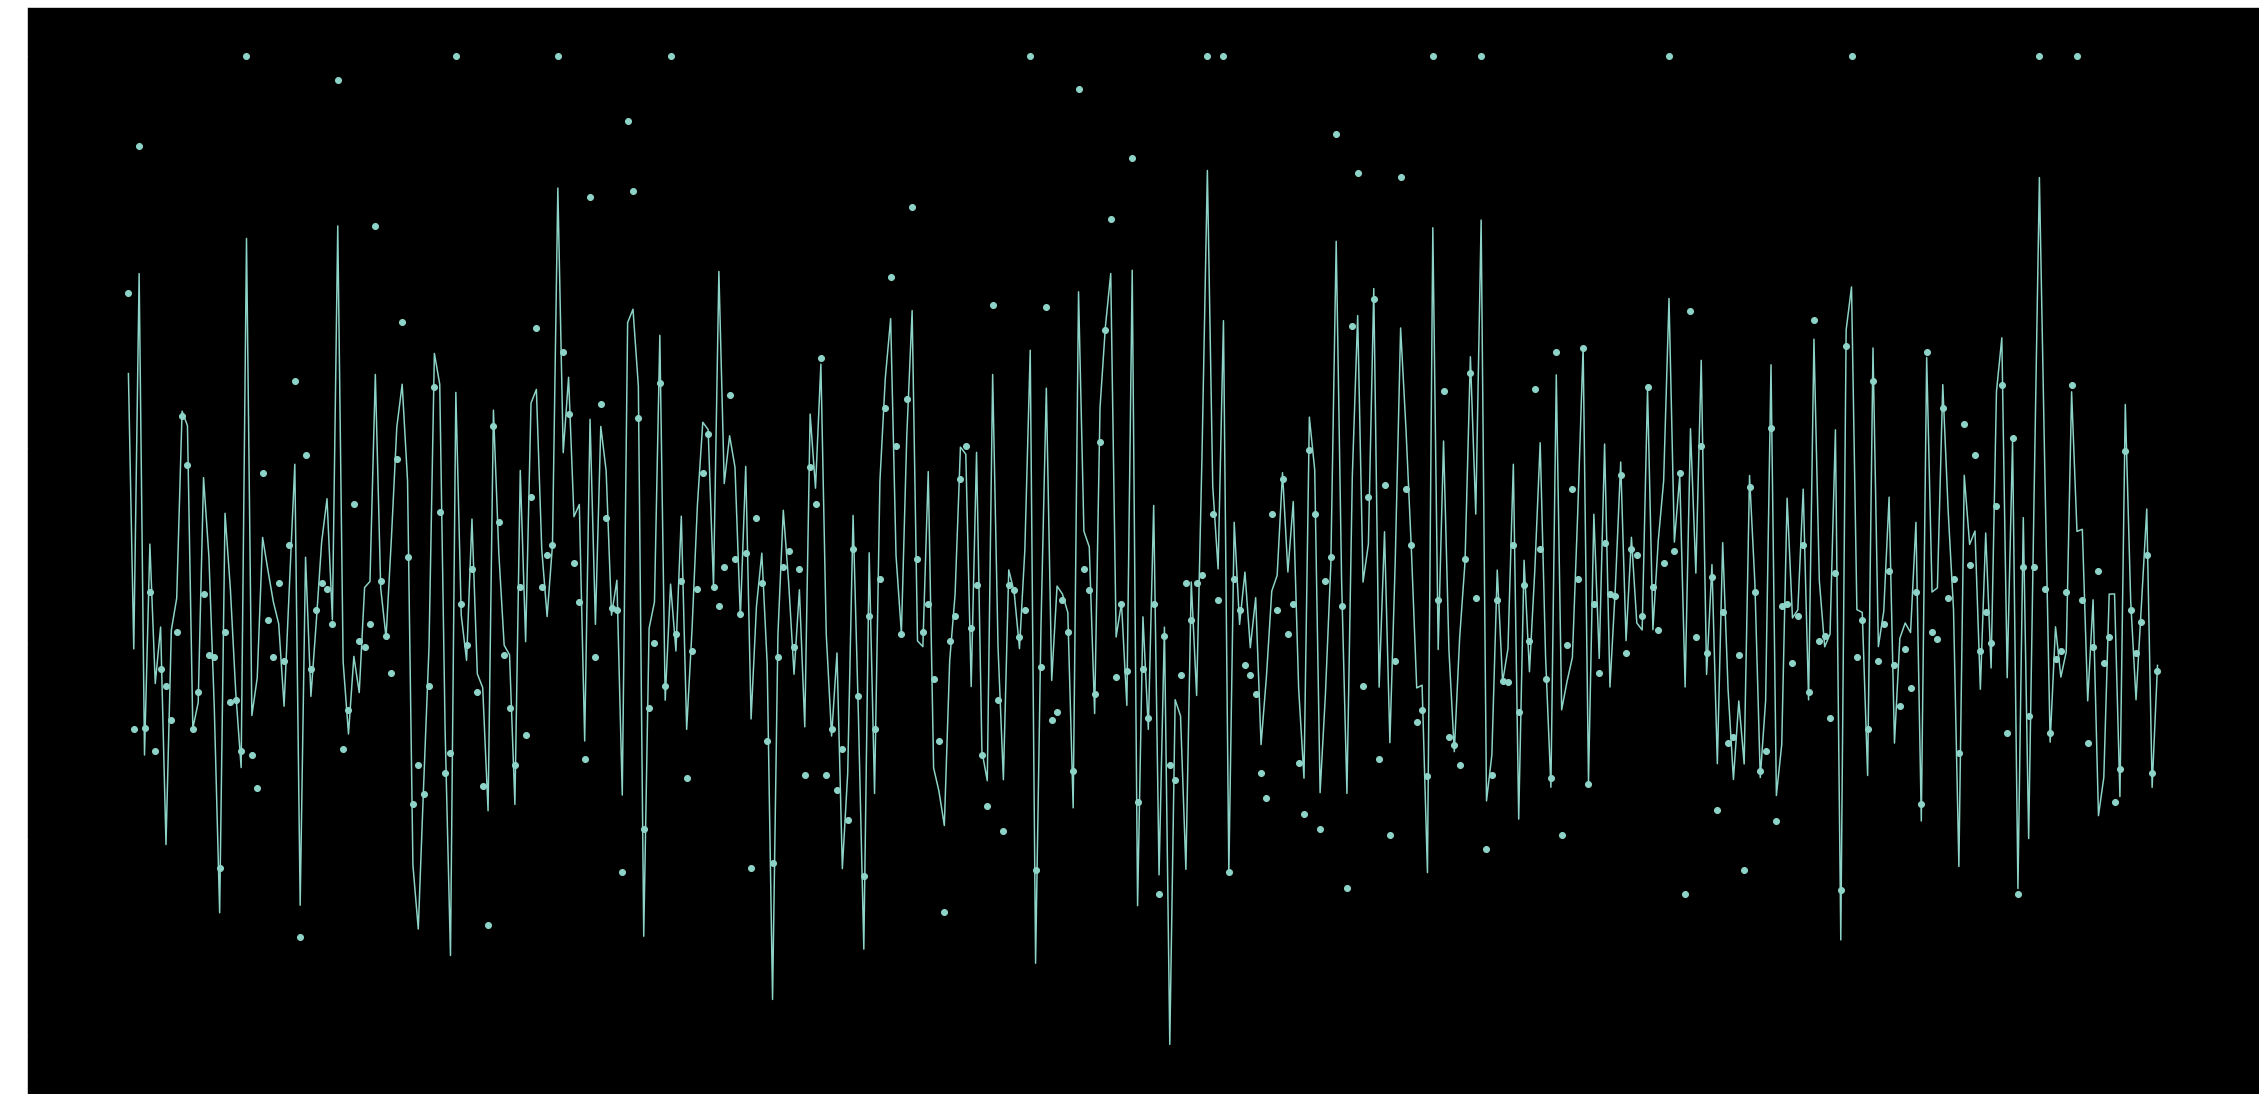

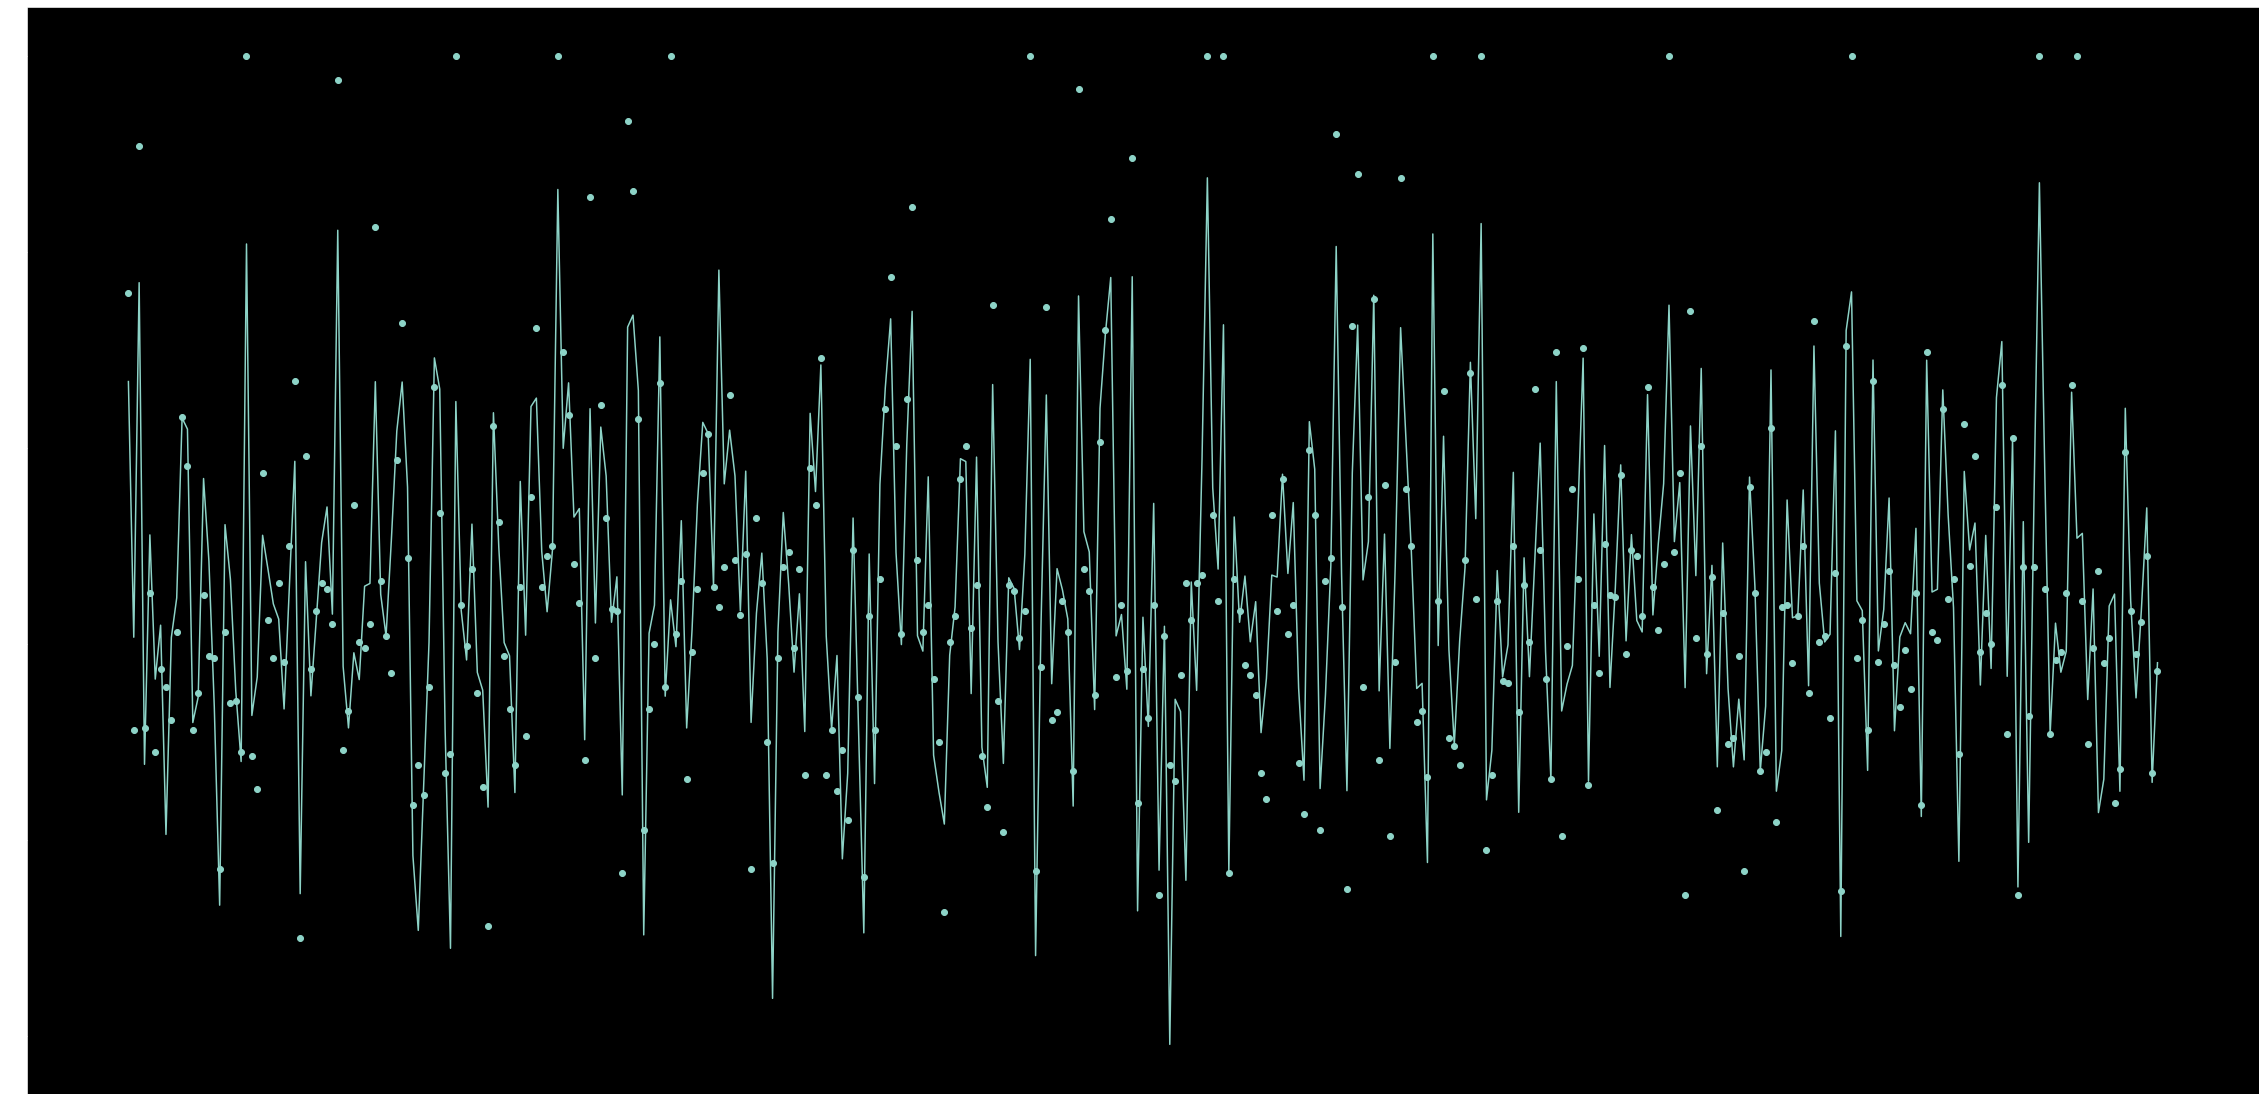

In [119]:
#Checking for overfitting
plt.figure(figsize = (40,20))
plt.scatter(x = range(len(y_train)), y = y_train)
plt.plot(sgd_results)
plt.figure(figsize = (40,20))
plt.scatter(x = range(len(y_train)), y = y_train)
plt.plot(ridge_filtered_results)

In [ ]:
#The model is still overfitted. Perhaps this problem will require better techniques or models. Will return once I've studied them.